<a href="https://colab.research.google.com/github/EgorMatveev26/Datasets/blob/main/%D0%9B%D0%A0_5_%D0%9F%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание датасета
Используемый набор данных содержит информацию о видах пингвинов и охватывает основные биологические показатели, такие как размеры клюва, масса и другие. Каждая строка представляет отдельного пингвина, а столбцы содержат следующие переменные:
- **species**: Вид пингвина
- **island**: Остров, на котором был найден пингвин
- **bill_length_mm**: Длина клюва в миллиметрах
- **bill_depth_mm**: Глубина клюва в миллиметрах
- **flipper_length_mm**: Длина плавника в миллиметрах
- **body_mass_g**: Масса пингвина в граммах
- **sex**: Пол пингвина (самец, самка)
- **year**: Год сбора данных

In [121]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.neighbors import NearestNeighbors
import sklearn
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.preprocessing import StandardScaler
from collections import Counter

In [122]:
# Присвоим переменной «url» ссылку на датасет:
url = 'https://raw.githubusercontent.com/EgorMatveev26/Datasets/refs/heads/main/palmerpenguins_original.csv'
# Создаем лист с названием столбцов:
cols = ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']
# Используем Pandas read_csv():
dataset = pd.read_csv(url, names = cols)

In [123]:
# Отображаем первые 5 строк датасета
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [125]:
# Проверка на отсутствующие значения
print(dataset.isnull().sum())
# Удаление строк с пропущенными значениями, если они есть
dataset.dropna(inplace=True)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [126]:
# Выводим информацию о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [127]:
# Извлекаем уникальные значения из столбца "species"-целевая переменная
vals = dataset["species"].unique()
vals

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [128]:
# Категориальные переменные кодируем в числовые
dataset = dataset.replace('female', 0).replace('male', 1).replace('Adelie', 0).replace('Gentoo', 1).replace('Chinstrap', 2)
dataset["island"] = dataset["island"].astype('category')
dataset["island_ind"] = dataset["island"].cat.codes
dataset["species"] = dataset["species"].astype(int)
dataset["sex"] = dataset["sex"].astype(int)

In [129]:
# Выводим информацию о датасете
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    int64   
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    int64   
 7   year               333 non-null    int64   
 8   island_ind         333 non-null    int8    
dtypes: category(1), float64(4), int64(3), int8(1)
memory usage: 21.6 KB


Датасет теперь не содержит столбцов типа object

In [130]:
# Датасет без целевой переменной и категориальных
df= dataset.drop(['species', 'island'], axis=1).copy()
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_ind
0,39.1,18.7,181.0,3750.0,1,2007,2
1,39.5,17.4,186.0,3800.0,0,2007,2
2,40.3,18.0,195.0,3250.0,0,2007,2
4,36.7,19.3,193.0,3450.0,0,2007,2
5,39.3,20.6,190.0,3650.0,1,2007,2


In [131]:
X = df
y = dataset['species']

# Нормализуем данные так, чтобы все значения находились в диапазоне от 0 до 1
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns, index=df.index)
# Посмотрим, как прошла нормализация
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_ind
0,0.254545,0.666667,0.152542,0.291667,1.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.0,0.0,1.0
4,0.167273,0.738095,0.355932,0.208333,0.0,0.0,1.0
5,0.261818,0.892857,0.305085,0.263889,1.0,0.0,1.0


In [132]:
# Анализируем, какое количество дельфинов в датасете каждого вида(species), то есть мы группируем все объекты по их целевой переменной (species) и просто считаем, сколько объектов попало в каждую группу
Counter(y)

Counter({0: 146, 1: 119, 2: 68})

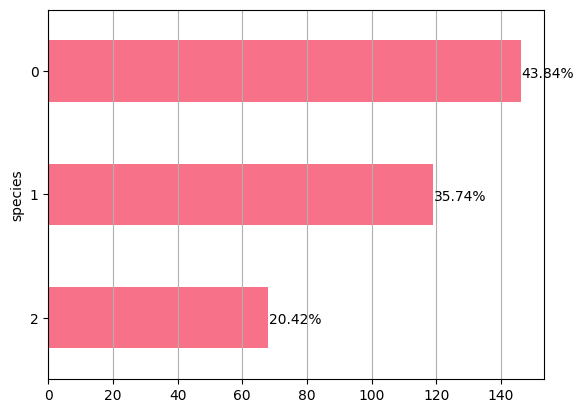

In [133]:
# Визуализируем в процентном соотношении
# Считаем количество объектов с одинаковыми значениями в столбце y - species и сортируем их
ax = y.value_counts().sort_values().plot(kind="barh")

# Затем формируем надписи для графика
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
            str(round((i.get_width()/total)*100, 2))+'%',
            fontsize=10, color='black')
ax.grid(axis="x")
plt.show()

Видим, что классы несбалансированные, балансируем их на следующем шаге.

In [134]:
# Балансируем классы с помощью SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [135]:
Counter(y)

Counter({0: 146, 1: 146, 2: 146})

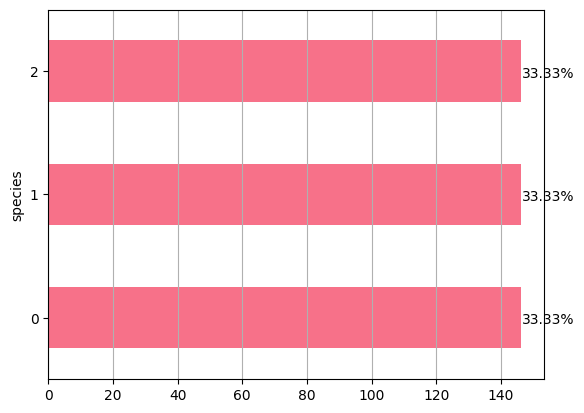

In [136]:
# Визуализируем в процентном соотношении
# Считаем количество объектов с одинаковыми значениями в столбце y - species и сортируем их
ax = y.value_counts().sort_values().plot(kind="barh")

# Затем формируем надписи для графика
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
            str(round((i.get_width()/total)*100, 2))+'%',
            fontsize=10, color='black')
ax.grid(axis="x")
plt.show()

Балансировка классов прошла успешно

##Метод главных компонентов (Principal Component Analysis, PCA)

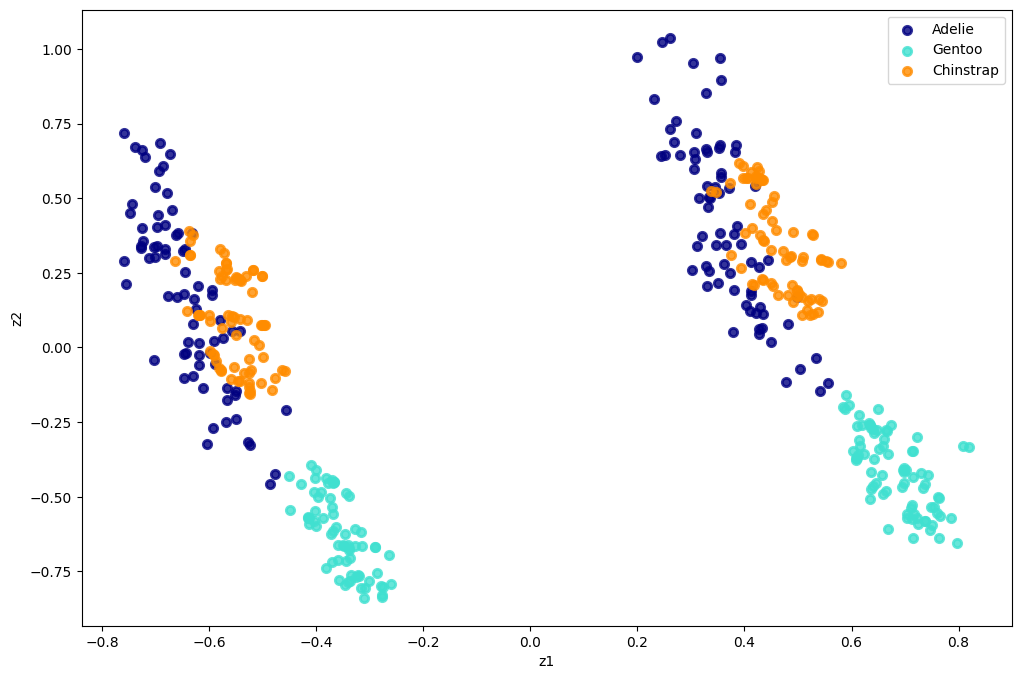

In [137]:
pca = PCA(n_components=2)
X_new = pca.fit(X).transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i in zip(colors, range(len(vals))):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Очень полезной функцией для оценки того, насколько каждый главный компонент сохраняет информацию о дисперсии наших данных, является функция explained_variance_ratio. Используя наш набор данных, мы можем вызвать explained_variance_ratio.

In [138]:
pca.explained_variance_ratio_

array([0.39568303, 0.26599053])

Первый главный компонент сохраняет 39% дисперсии набора данных, второй главный компонент сохраняет 26% дисперсии. В сумме главные компоненты объясняют около 66% общей дисперсии набора данных. Результаты PCA дают основания для дальнейшего анализа данных.

##Независисый анализ компонентов (Independent Component Analysis, ICA)

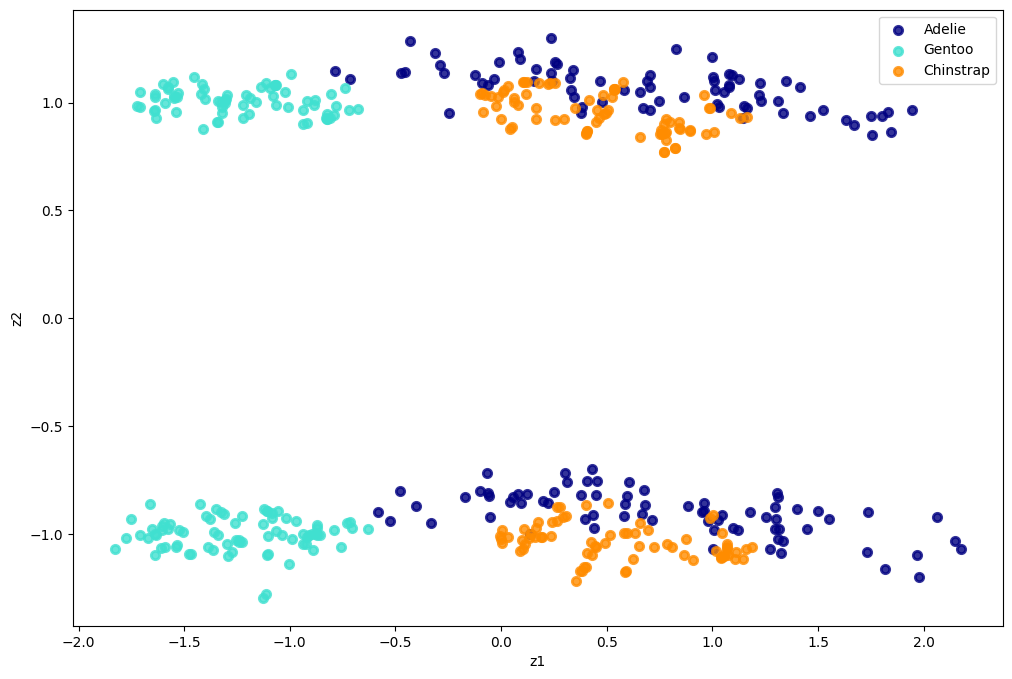

In [139]:
fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i in zip(colors, range(len(vals))):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [140]:
# Матрица смешивания
fast_ica.mixing_

array([[-0.07431992, -0.0831709 ],
       [ 0.17385545, -0.08957608],
       [-0.18904336, -0.07604634],
       [-0.16518406, -0.09906004],
       [-0.00357565, -0.49740604],
       [-0.13307675,  0.01720134],
       [ 0.28360801,  0.006483  ]])

Строки матрицы смешивания показывают, как каждый признак (длина клюва, глубина клюва, длина плавника, масса, пол, год сбора данных и остров, на котором был найден пингвин) влияет на две выделенные независимые компоненты. Физические характеристики длина клюва и плавника, масса, пол в основном негативно влияют на компоненты, в то же время глубина клюва, год сбора данных и, особенно, остров нахождения демонстрируют более выраженные и позитивные связи.

#Нелинейные методы уменьшения размерности

##Kernel PCA

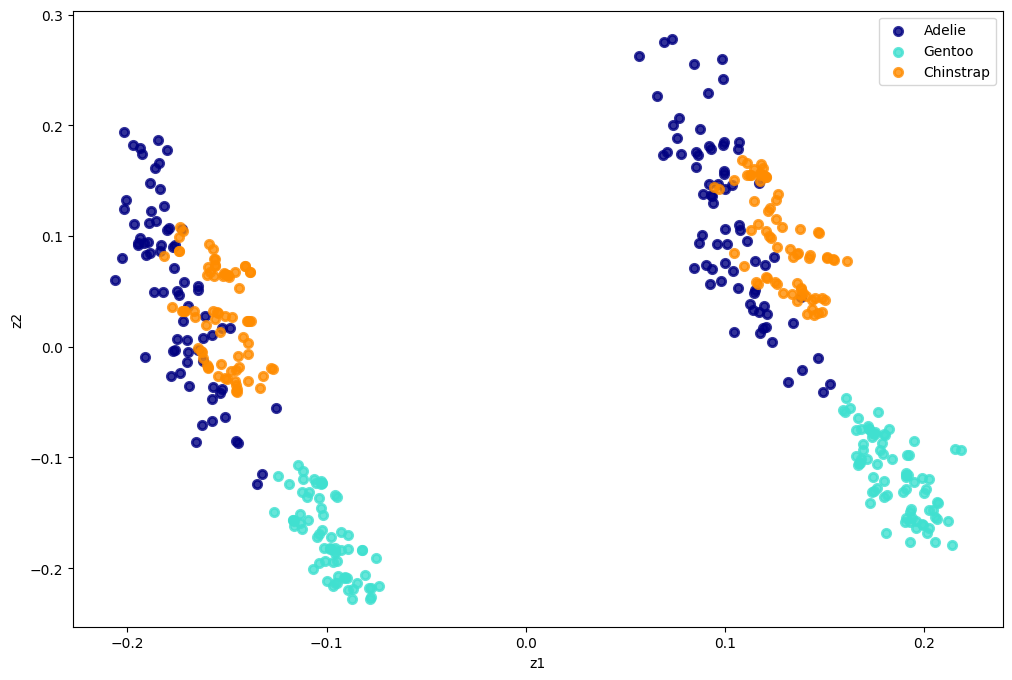

In [141]:
rbf_pca = KernelPCA(n_components=6, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i in zip(colors, range(len(vals))):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

##tSNE

In [142]:
tsne = TSNE(n_components=2) # Указывает, что мы хотим сократить размерность данных до 2D (двумерного пространства), что позволяет визуализировать результаты на плоскости
X_new = tsne.fit_transform(X)

# Вывод результатов
print('Initial Shape of X: ', X.shape) # Количество строк и столбцов в изначальном наборе данных
print('New Shape of X: ', X_new.shape) # Количество строк и столбцов в новом наборе данных, размерность была уменьшена,
                                      # и теперь каждое наблюдение представлено как точка в двумерном пространстве
# Смотрим насколько хорошо алгоритм сохранил отношения между точками в исходном пространстве в новом пространстве
# Более низкие значения указывают на лучшее соответствие между исходными и преобразованными данными
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_) # Количество итераций, выполненных в процессе оптимизации t-SNE

Initial Shape of X:  (438, 7)
New Shape of X:  (438, 2)
Kullback-Leibler divergence after optimization:  0.11445660144090652
No. of iterations:  999


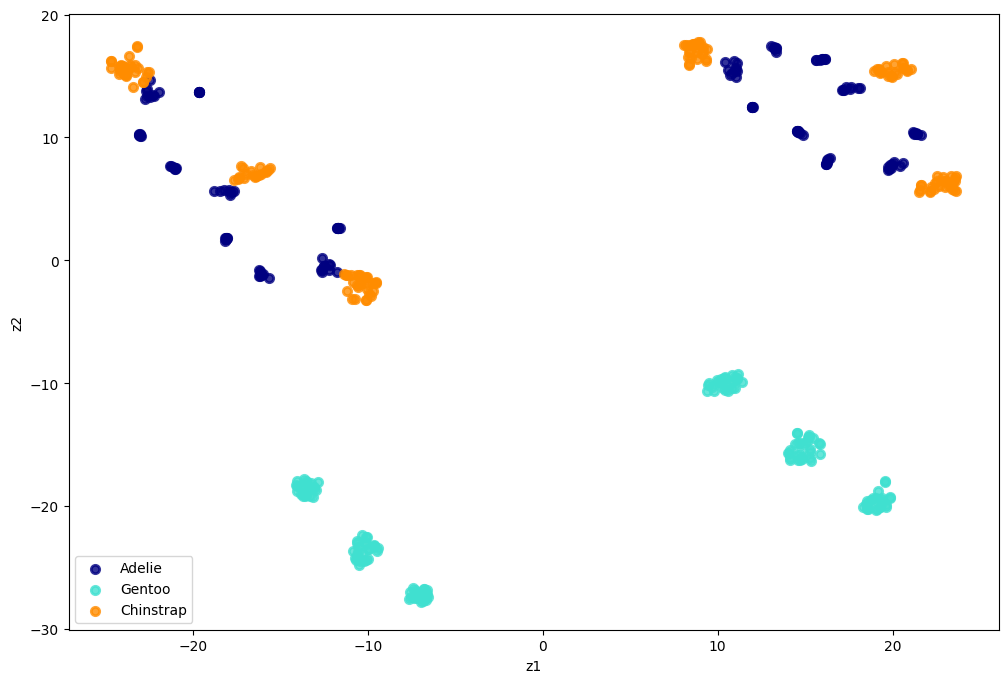

In [143]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i in zip(colors, range(len(vals))):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

##Поиск выбросов. DBSCAN

In [153]:
dbscan_cluster1 = DBSCAN(eps = 0.28, min_samples = 3)
X_new = dbscan_cluster1.fit(X)

In [154]:
# Количество кластеров
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Выбросы
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Соответствие метрик, которое помогает оценить качество кластеризации
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 25
Estimated no. of noise points: 3
v_measure = 0.4218971980841774


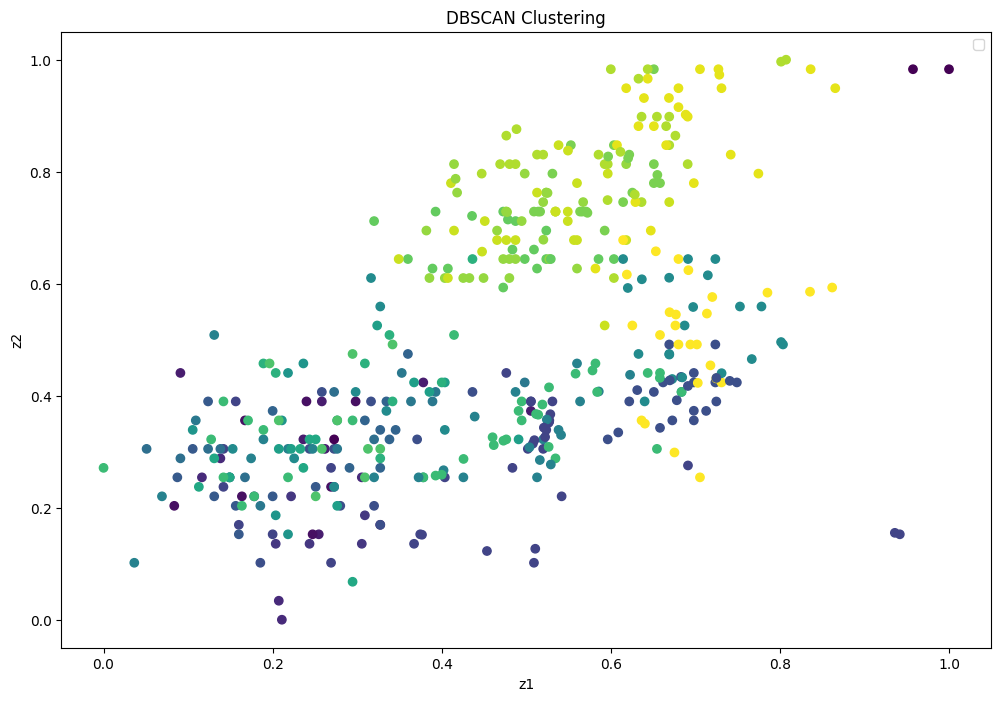

In [155]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

plt.scatter(
    X[cols[2]], X[cols[4]], c=dbscan_cluster1.labels_
)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('DBSCAN Clustering')
plt.show()

##DBSCAN ("метод локтя")

In [147]:
min_samples = 5

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

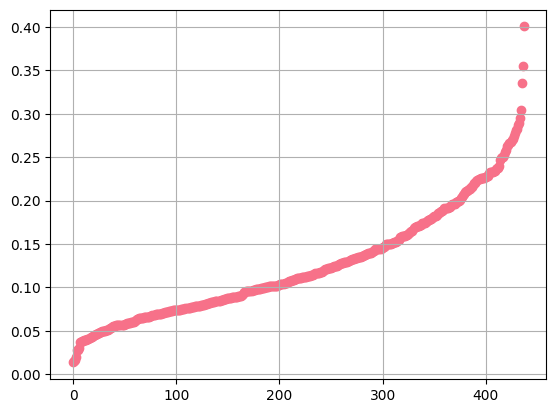

In [148]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.grid()
plt.show()

## DBSCAN для определения выбросов

In [149]:
dbscan = DBSCAN(eps = 0.51, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=0.51)


In [150]:
pred = dbscan.fit_predict(X)

In [151]:
# Количество кластеров
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Выбросы
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Соответствие метрик, которое помогает оценить качество кластеризации
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 3
Estimated no. of noise points: 0
v_measure = 0.31071273501218016


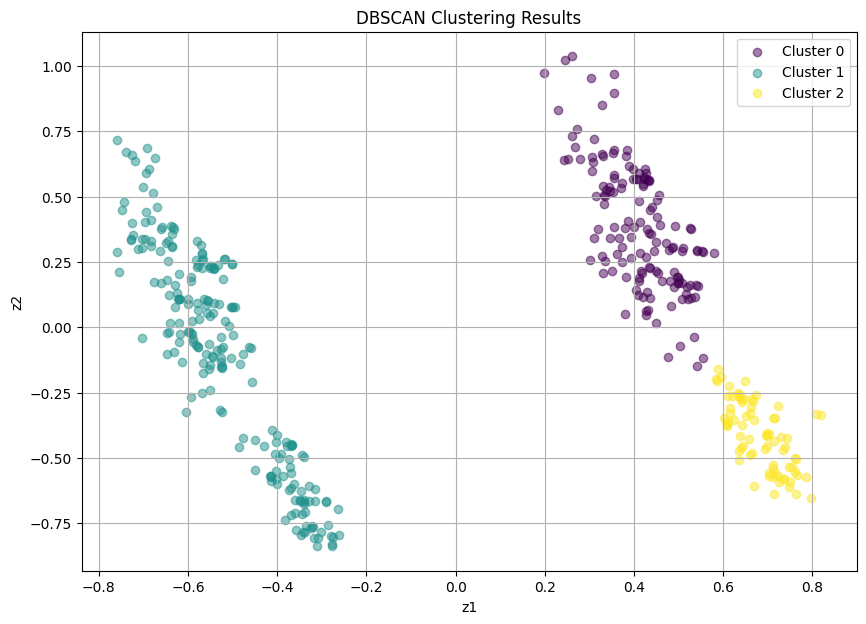

In [152]:
# Применяем PCA для снижения размерности
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация результатов
plt.figure(figsize=(10, 7))
unique_labels = set(pred)

# Задаем цвета для каждого кластера
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:  # Если это шум
        col = 'r'  # Красный для выбросов
    class_member_mask = (pred == k)

    # Визуализируем точки
    plt.scatter(X_pca[class_member_mask, 0], X_pca[class_member_mask, 1],
                color=col, label=f'Cluster {k}', alpha=0.5)

plt.title('DBSCAN Clustering Results')
plt.xlabel("z1")
plt.ylabel("z2")
plt.legend(loc='best')
plt.grid()
plt.show()